In [91]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report,confusion_matrix
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import re
import seaborn as sns
import xgboost as xgb


In [92]:
#1. Load the Data
df = pd.read_csv('/content/credit-score-train.csv')
print("Successfully loaded")
print("Shape of the dataset=",df.shape)
print("Size of the dataset=",df.size)


Successfully loaded
Shape of the dataset= (100000, 28)
Size of the dataset= 2800000


<ipython-input-92-37f3b83d619e>:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/credit-score-train.csv')


In [93]:

#2. Basic Information
print("\n--- Dataset Info ---")
df.info()

print("\n--- Descriptive Statistics ---")
print(df.describe().T)

print(f"\nDataset Shape: {df.shape[0]} rows, {df.shape[1]} columns")


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan           

In [94]:
# 3. Missing Values Analysis
print("\n--- Missing Values ---")
missing_data = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_info = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing %': missing_percentage
})
missing_info = missing_info[missing_info['Missing Count'] > 0].sort_values(by='Missing %', ascending=False)
if missing_info.empty:
    print("No missing values found.")
else:
    print(missing_info)



--- Missing Values ---
                         Missing Count  Missing %
Monthly_Inhand_Salary            15002     15.002
Type_of_Loan                     11408     11.408
Name                              9985      9.985
Credit_History_Age                9030      9.030
Num_of_Delayed_Payment            7002      7.002
Amount_invested_monthly           4479      4.479
Num_Credit_Inquiries              1965      1.965
Monthly_Balance                   1200      1.200



--- Distribution of Target Variable: 'Credit_Score' ---
Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64
Credit_Score
Standard    53.174
Poor        28.998
Good        17.828
Name: proportion, dtype: float64


<ipython-input-95-578f8b9f468b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target_column, data=df, palette='viridis')


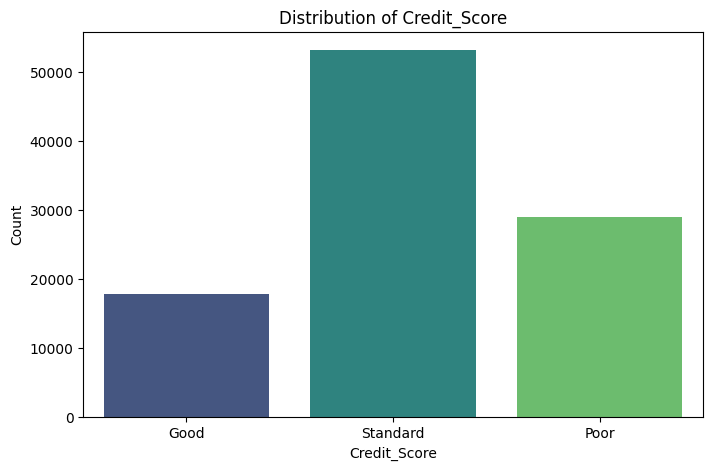

In [95]:
# --- 4. Target Variable Distribution ---

target_column = 'Credit_Score'

print(f"\n--- Distribution of Target Variable: '{target_column}' ---")
print(df[target_column].value_counts())
print(df[target_column].value_counts(normalize=True) * 100)

plt.figure(figsize=(8, 5))
sns.countplot(x=target_column, data=df, palette='viridis')
plt.title(f'Distribution of {target_column}')
plt.xlabel(target_column)
plt.ylabel('Count')
plt.show()


--- Categorical Feature Analysis ---

Feature: ID
ID
0x25fd5    1
0x25fd4    1
0x25fd3    1
0x25fd2    1
0x25fd1    1
          ..
0x1606     1
0x1605     1
0x1604     1
0x1603     1
0x1602     1
Name: count, Length: 100000, dtype: int64
Number of unique values: 100000
Skipping plot for ID due to high number of unique categories.

Feature: Customer_ID
Customer_ID
CUS_0x942c    8
CUS_0xd40     8
CUS_0x21b1    8
CUS_0x2dbc    8
CUS_0x1d18    8
             ..
CUS_0x4157    8
CUS_0x5407    8
CUS_0x284a    8
CUS_0x95ee    8
CUS_0x1cdb    8
Name: count, Length: 12500, dtype: int64
Number of unique values: 12500
Skipping plot for Customer_ID due to high number of unique categories.

Feature: Month
Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64
Number of unique values: 8


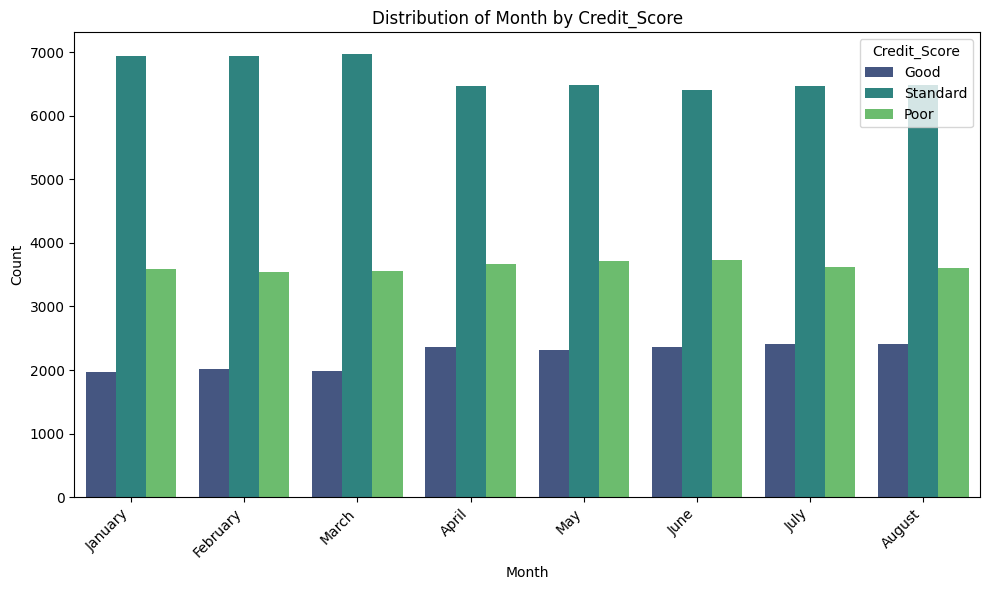


Feature: Name
Name
Stevex                44
Langep                44
Vaughanl              39
Jessicad              39
Deepa Seetharamanm    38
                      ..
Bavierq                4
Alina Selyukhg         4
Janeman Latulf         4
Lucye                  4
Timothyl               3
Name: count, Length: 10139, dtype: int64
Number of unique values: 10139
Skipping plot for Name due to high number of unique categories.

Feature: Age
Age
38      2833
28      2829
31      2806
26      2792
32      2749
        ... 
6618       1
3155       1
5063       1
2875       1
4347       1
Name: count, Length: 1788, dtype: int64
Number of unique values: 1788
Skipping plot for Age due to high number of unique categories.

Feature: SSN
SSN
#F%$D@*&8      5572
940-15-4402       8
571-35-3463       8
422-50-2476       8
430-60-9262       8
               ... 
604-62-6133       4
331-28-1921       4
838-33-4811       4
856-06-6147       4
753-72-2651       4
Name: count, Length: 12501, dtype: in

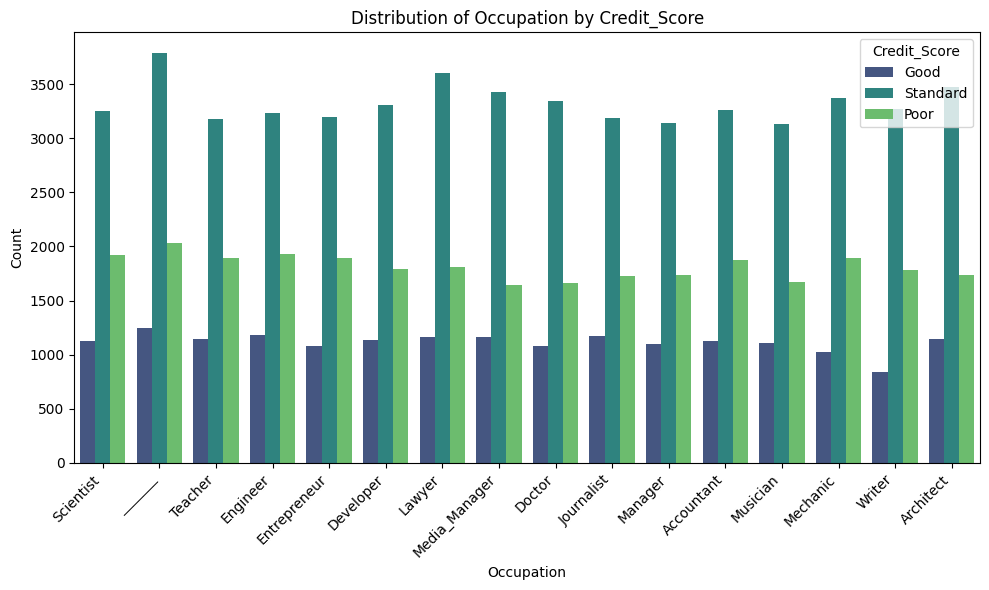


Feature: Annual_Income
Annual_Income
36585.12     16
20867.67     16
17273.83     16
95596.35     15
33029.66     15
             ..
3917169.0     1
89394.78_     1
36806.84_     1
24363.78_     1
95685.21_     1
Name: count, Length: 18940, dtype: int64
Number of unique values: 18940
Skipping plot for Annual_Income due to high number of unique categories.

Feature: Num_of_Loan
Num_of_Loan
3      14386
2      14250
4      14016
0      10380
1      10083
       ...  
41         1
18         1
56         1
657        1
917        1
Name: count, Length: 434, dtype: int64
Number of unique values: 434
Skipping plot for Num_of_Loan due to high number of unique categories.

Feature: Type_of_Loan
Type_of_Loan
Not Specified                                                                                                                    1408
Credit-Builder Loan                                                                                                              1280
Personal Loan        

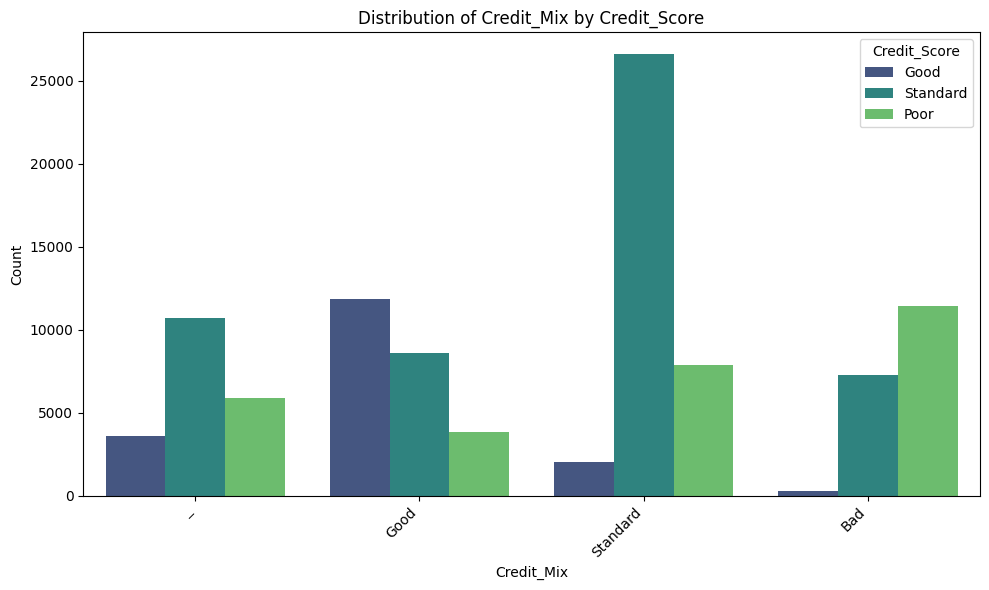


Feature: Outstanding_Debt
Outstanding_Debt
1360.45     24
1151.7      23
460.46      23
1109.03     23
1329.59     16
            ..
1619.56_     1
297.64_      1
1264.42_     1
1617.55_     1
1324.1_      1
Name: count, Length: 13178, dtype: int64
Number of unique values: 13178
Skipping plot for Outstanding_Debt due to high number of unique categories.

Feature: Credit_History_Age
Credit_History_Age
15 Years and 11 Months    446
19 Years and 4 Months     445
19 Years and 5 Months     444
17 Years and 11 Months    443
19 Years and 3 Months     441
                         ... 
0 Years and 3 Months       20
0 Years and 2 Months       15
33 Years and 7 Months      14
33 Years and 8 Months      12
0 Years and 1 Months        2
Name: count, Length: 404, dtype: int64
Number of unique values: 404
Skipping plot for Credit_History_Age due to high number of unique categories.

Feature: Payment_of_Min_Amount
Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64


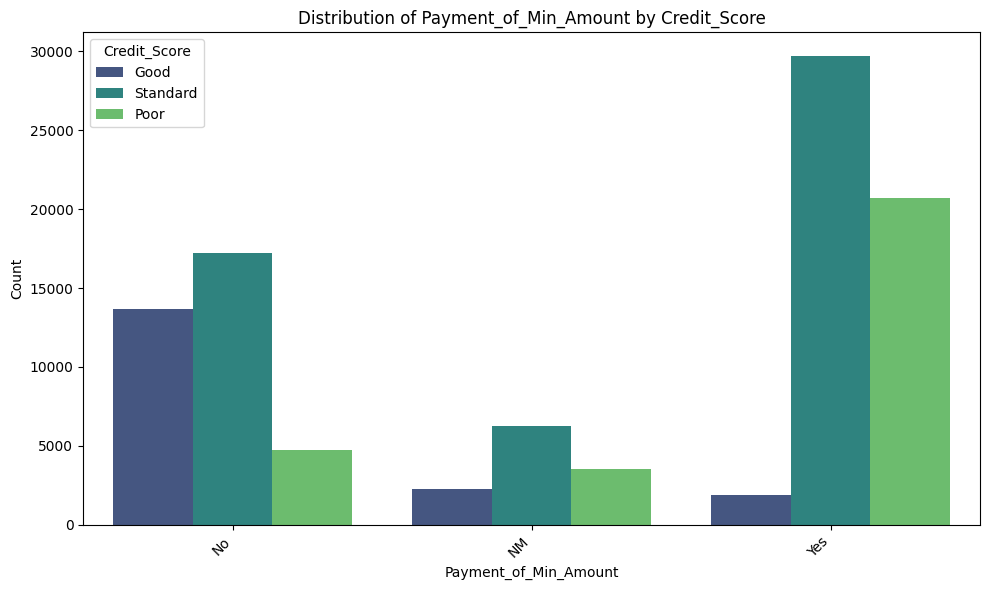


Feature: Amount_invested_monthly
Amount_invested_monthly
__10000__             4305
0.0                    169
59.93725850034815        1
165.180659491917         1
62.030802602004044       1
                      ... 
109.296681189146         1
33.6098814431885         1
76.87001005130772        1
908.6939096189257        1
401.35900899207513       1
Name: count, Length: 91049, dtype: int64
Number of unique values: 91049
Skipping plot for Amount_invested_monthly due to high number of unique categories.

Feature: Payment_Behaviour
Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64
Number of unique values: 7


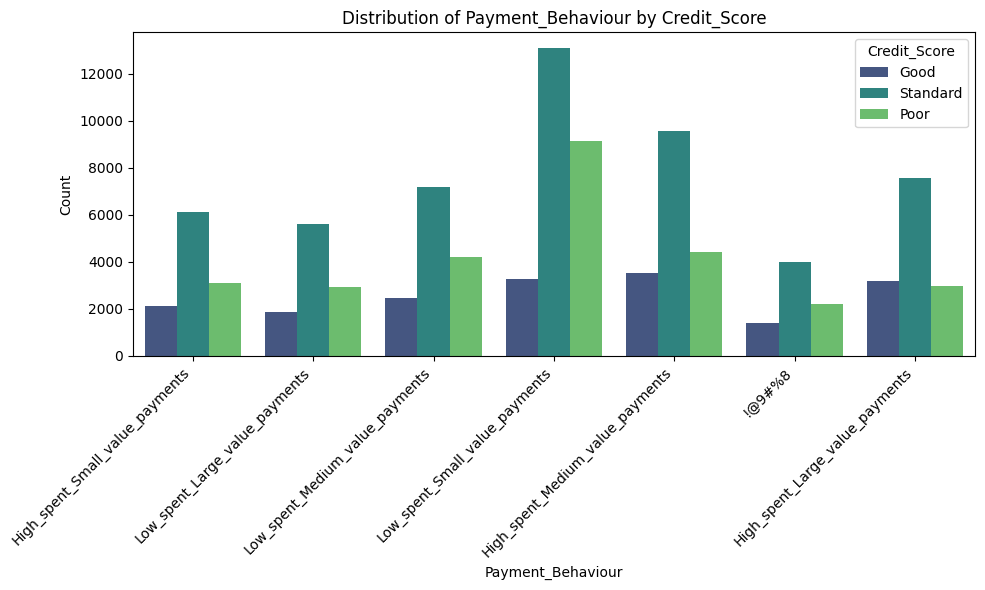


Feature: Monthly_Balance
Monthly_Balance
__-333333333333333333333333333__    9
252.08489793906085                  1
254.9709216273975                   1
250.0931678204641                   1
289.7550752754317                   1
                                   ..
278.8720257394474                   1
376.7024623690405                   1
321.2336043357731                   1
373.29270287694055                  1
336.6371802877606                   1
Name: count, Length: 98792, dtype: int64
Number of unique values: 98792
Skipping plot for Monthly_Balance due to high number of unique categories.


In [96]:

# --- 5. Categorical Feature Analysis ---
print("\n--- Categorical Feature Analysis ---")
categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
if target_column in categorical_cols:
    categorical_cols.remove(target_column)

if not categorical_cols:
    print("No categorical features found (excluding target).")
else:
    for col in categorical_cols:
        print(f"\nFeature: {col}")
        print(df[col].value_counts())
        print(f"Number of unique values: {df[col].nunique()}")
        if df[col].nunique() < 20:
            plt.figure(figsize=(10, 6))
            sns.countplot(x=col, data=df, hue=target_column, palette='viridis')
            plt.title(f'Distribution of {col} by {target_column}')
            plt.xlabel(col)
            plt.ylabel('Count')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
        else:
            print(f"Skipping plot for {col} due to high number of unique categories.")

In [98]:
def get_column_details(df, column):
    if column not in df.columns:
        print(f"Column '{column}' not found in DataFrame.")
        return

    print(f"Details of column: '{column}'\n")

    # Data Type
    print(f"Data Type: {df[column].dtype}")

    # Null Values
    count_null = df[column].isnull().sum()
    if count_null == 0:
        print("There are no null values.")
    else:
        print(f"There are {count_null} null values.")

    # Unique Values
    print(f"Number of unique values: {df[column].nunique()}")

    # Value Distribution
    print("\nValue distribution (top 10):")
    print(df[column].value_counts(dropna=False).head(10))


In [99]:
def fill_missing_with_group_mode(df, groupby, column):
    """
    Fills missing values in 'column' using the mode (most frequent value) within each group defined by 'groupby'.
    """
    before_missing = df[column].isnull().sum()
    print(f"\nMissing values in '{column}' before filling: {before_missing}")

    # Compute mode for each group and fill missing values
    mode_per_group = df.groupby(groupby)[column].transform(lambda x: x.mode().iat[0] if not x.mode().empty else np.nan)
    df[column] = df[column].fillna(mode_per_group)

    after_missing = df[column].isnull().sum()
    print(f"Missing values in '{column}' after filling with group-wise mode based on '{groupby}': {after_missing}")


In [100]:
def clean_categorical_field(df, groupby, column, replace_value=None):
    print("\n-----------------------------------------------------")
    print(f"Cleaning column: '{column}'")
    if replace_value is not None:
        if isinstance(replace_value, list):
            df[column] = df[column].replace(replace_value, np.nan)
            print(f"Replaced {replace_value} with NaN.")
        else:
            df[column] = df[column].replace(replace_value, np.nan)
            print(f"Replaced '{replace_value}' with NaN.")
    else:
        print("No garbage value replacement.")

    fill_missing_with_group_mode(df, groupby, column)
    print(f"Done cleaning '{column}'")


In [101]:

def fix_inconsistent_values(df, groupby, column):
    """
    - Prints before/after min-max info.
    - Finds each group’s true min, max and most common value.
    - Drops negatives or out‐of‐range to NaN.
    - Fills NaNs with group‐mode then overall mean.
    """
    print(f"\nBefore cleaning '{column}':")
    print("  Min:", df[column].min(), "  Max:", df[column].max())

    # 1) Compute per‐row valid bounds via group transform
    valid_min = df.groupby(groupby)[column].transform('min')
    valid_max = df.groupby(groupby)[column].transform('max')

    # 2) Mask negatives or outside [valid_min, valid_max]
    mask = (df[column] < 0) | (df[column] < valid_min) | (df[column] > valid_max)
    df.loc[mask, column] = np.nan

    # 3) Impute with group‐mode
    mode_by_group = df.groupby(groupby)[column] \
                      .transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
    df[column] = df[column].fillna(mode_by_group)

    # 4) Final fallback: overall mean
    df[column].fillna(df[column].mean(), inplace=True)

    print(f"After cleaning '{column}':")
    print("  Min:", df[column].min(), "  Max:", df[column].max())
    print("  Unique values:", df[column].nunique())
    print("  Nulls:", df[column].isna().sum())
    return df


In [102]:
#Method to clean Numerical Field
def clean_numerical_field(df, groupby, column,
                          strip=None, datatype=None, replace_value=None):
    """
    - Optionally replace a garbage value → NaN.
    - Optionally strip leading/trailing chars.
    - Optionally cast the dtype.
    - Then call fix_inconsistent_values().
    """
    print("\n" + "-"*50)
    print(f"Cleaning '{column}'")

    # Replace specified garbage
    if replace_value is not None:
        df[column] = df[column].replace(replace_value, np.nan)
        print(f"  Replaced '{replace_value}' with NaN.")

    # Strip characters if object
    if strip and df[column].dtype == object:
        df[column] = df[column].str.strip(strip)
        print(f"  Stripped leading/trailing '{strip}'.")

    # Cast type
    if datatype:
        df[column] = df[column].astype(datatype)
        print(f"  Cast '{column}' to {datatype}.")

    # Fix inconsistent by group
    df = fix_inconsistent_values(df, groupby, column)
    return df

In [103]:
column_name = 'Credit_Score'

#Get Details
get_column_details(df,column_name)

Details of column: 'Credit_Score'

Data Type: object
There are no null values.
Number of unique values: 3

Value distribution (top 10):
Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64


In [104]:
get_column_details(df,'ID')
get_column_details(df,'Customer_ID')
#Check if same customer can have different credit score
df.groupby(['Customer_ID'])['Credit_Score'].nunique()

Details of column: 'ID'

Data Type: object
There are no null values.
Number of unique values: 100000

Value distribution (top 10):
ID
0x25fd5    1
0x25fd4    1
0x25fd3    1
0x25fd2    1
0x25fd1    1
0x25fd0    1
0x25fcf    1
0x25fce    1
0x25fc9    1
0x25fc8    1
Name: count, dtype: int64
Details of column: 'Customer_ID'

Data Type: object
There are no null values.
Number of unique values: 12500

Value distribution (top 10):
Customer_ID
CUS_0x942c    8
CUS_0xd40     8
CUS_0x21b1    8
CUS_0x2dbc    8
CUS_0x1d18    8
CUS_0x1285    8
CUS_0x3048    8
CUS_0x944e    8
CUS_0x8788    8
CUS_0x2c0a    8
Name: count, dtype: int64


,Credit_Score
Customer_ID,
CUS_0x1000,2
CUS_0x1009,1
CUS_0x100b,2
CUS_0x1011,1
CUS_0x1013,1
...,...
CUS_0xff3,2
CUS_0xff4,1
CUS_0xff6,2


In [ ]:
column_name = 'Month'

#Get Details
get_column_details(df,column_name)

Details of column: 'Month'

Data Type: object
There are no null values.
Number of unique values: 8

Value distribution (top 10):
Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64


In [105]:
#Convert Month to datetime object
df['Month'] = pd.to_datetime(df.Month, format='%B').dt.month

In [107]:
column_name = 'Name'

#Get Details
get_column_details(df,column_name)

Details of column: 'Name'

Data Type: object
There are 9985 null values.
Number of unique values: 10139

Value distribution (top 10):
Name
NaN                   9985
Stevex                  44
Langep                  44
Jessicad                39
Vaughanl                39
Jessica Wohlt           38
Raymondr                38
Danielz                 38
Deepa Seetharamanm      38
Nicko                   37
Name: count, dtype: int64


In [108]:
column_name = 'SSN'
group_by = 'Customer_ID'
garbage_value = '#F%$D@*&8'

#Get Details
get_column_details(df,column_name)

#Cleaning
clean_categorical_field(df,group_by,column_name,garbage_value)

Details of column: 'SSN'

Data Type: object
There are no null values.
Number of unique values: 12501

Value distribution (top 10):
SSN
#F%$D@*&8      5572
940-15-4402       8
571-35-3463       8
422-50-2476       8
430-60-9262       8
333-11-9700       8
043-16-9013       8
013-06-9077       8
266-42-7784       8
356-66-2055       8
Name: count, dtype: int64

-----------------------------------------------------
Cleaning column: 'SSN'
Replaced '#F%$D@*&8' with NaN.

Missing values in 'SSN' before filling: 5572
Missing values in 'SSN' after filling with group-wise mode based on 'Customer_ID': 0
Done cleaning 'SSN'


In [109]:
column_name = 'Occupation'
group_by = 'Customer_ID'
garbage_value = '_______'

#Get Details
get_column_details(df,column_name)

#Cleaning
clean_categorical_field(df,group_by,column_name,garbage_value)

Details of column: 'Occupation'

Data Type: object
There are no null values.
Number of unique values: 16

Value distribution (top 10):
Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Name: count, dtype: int64

-----------------------------------------------------
Cleaning column: 'Occupation'
Replaced '_______' with NaN.

Missing values in 'Occupation' before filling: 7062
Missing values in 'Occupation' after filling with group-wise mode based on 'Customer_ID': 0
Done cleaning 'Occupation'


In [110]:
#Get Details of Type of Loan column
get_column_details(df,'Type_of_Loan')

Details of column: 'Type_of_Loan'

Data Type: object
There are 11408 null values.
Number of unique values: 6260

Value distribution (top 10):
Type_of_Loan
NaN                        11408
Not Specified               1408
Credit-Builder Loan         1280
Personal Loan               1272
Debt Consolidation Loan     1264
Student Loan                1240
Payday Loan                 1200
Mortgage Loan               1176
Auto Loan                   1152
Home Equity Loan            1136
Name: count, dtype: int64


In [111]:
#Handle Type of Loan null values
df['Type_of_Loan'].replace([np.nan], 'Not Specified', inplace=True)

<ipython-input-111-0bdd76e9626e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Type_of_Loan'].replace([np.nan], 'Not Specified', inplace=True)


In [112]:
column_name = 'Credit_Mix'
group_by = 'Customer_ID'
garbage_value = '_'

#Get Details
get_column_details(df,column_name)

#Cleaning
clean_categorical_field(df,group_by,column_name,garbage_value)

Details of column: 'Credit_Mix'

Data Type: object
There are no null values.
Number of unique values: 4

Value distribution (top 10):
Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: count, dtype: int64

-----------------------------------------------------
Cleaning column: 'Credit_Mix'
Replaced '_' with NaN.

Missing values in 'Credit_Mix' before filling: 20195
Missing values in 'Credit_Mix' after filling with group-wise mode based on 'Customer_ID': 0
Done cleaning 'Credit_Mix'


In [113]:
column_name = 'Payment_of_Min_Amount'

#Get Details
get_column_details(df,column_name)

Details of column: 'Payment_of_Min_Amount'

Data Type: object
There are no null values.
Number of unique values: 3

Value distribution (top 10):
Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64


In [114]:
column_name = 'Payment_Behaviour'
group_by = 'Customer_ID'
garbage_value = '!@9#%8'

#Get Details
get_column_details(df,column_name)

#Cleaning
clean_categorical_field(df,group_by,column_name,garbage_value)

Details of column: 'Payment_Behaviour'

Data Type: object
There are no null values.
Number of unique values: 7

Value distribution (top 10):
Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64

-----------------------------------------------------
Cleaning column: 'Payment_Behaviour'
Replaced '!@9#%8' with NaN.

Missing values in 'Payment_Behaviour' before filling: 7600
Missing values in 'Payment_Behaviour' after filling with group-wise mode based on 'Customer_ID': 0
Done cleaning 'Payment_Behaviour'


In [115]:
column_name = 'Age'
group_by = 'Customer_ID'
user_friendly_name = 'Age'

#Get Details
get_column_details(df,column_name)

#Cleaning
clean_numerical_field(df,group_by,column_name,strip='_',datatype='int')

Details of column: 'Age'

Data Type: object
There are no null values.
Number of unique values: 1788

Value distribution (top 10):
Age
38    2833
28    2829
31    2806
26    2792
32    2749
25    2737
36    2720
35    2716
34    2707
27    2707
Name: count, dtype: int64

--------------------------------------------------
Cleaning 'Age'
  Stripped leading/trailing '_'.
  Cast 'Age' to int.

Before cleaning 'Age':
  Min: -500   Max: 8698
After cleaning 'Age':
  Min: 14.0   Max: 8698.0
  Unique values: 1727
  Nulls: 0


<ipython-input-101-b977c4b4acf8>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,3,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,4,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,5,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,6,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,7,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [116]:
column_name = 'Annual_Income'
group_by = 'Customer_ID'

#Get Details
get_column_details(df,column_name)

#Cleaning
clean_numerical_field(df,group_by,column_name,strip='_',datatype='float')

Details of column: 'Annual_Income'

Data Type: object
There are no null values.
Number of unique values: 18940

Value distribution (top 10):
Annual_Income
36585.12     16
20867.67     16
17273.83     16
95596.35     15
33029.66     15
9141.63      15
17816.75     15
72524.2      14
32543.38     14
109945.32    14
Name: count, dtype: int64

--------------------------------------------------
Cleaning 'Annual_Income'
  Stripped leading/trailing '_'.
  Cast 'Annual_Income' to float.

Before cleaning 'Annual_Income':
  Min: 7005.93   Max: 24198062.0
After cleaning 'Annual_Income':
  Min: 7005.93   Max: 24198062.0
  Unique values: 13487
  Nulls: 0


<ipython-input-101-b977c4b4acf8>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,3,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,4,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,5,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,6,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,7,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [117]:
column_name = 'Monthly_Inhand_Salary'
group_by = 'Customer_ID'

#Get Details
get_column_details(df,column_name)

#Cleaning
clean_numerical_field(df,group_by,column_name)

Details of column: 'Monthly_Inhand_Salary'

Data Type: float64
There are 15002 null values.
Number of unique values: 13235

Value distribution (top 10):
Monthly_Inhand_Salary
NaN            15002
2295.058333       15
6358.956667       15
6082.187500       15
6769.130000       15
3080.555000       14
6639.560000       13
5766.491667       13
4387.272500       13
536.431250        12
Name: count, dtype: int64

--------------------------------------------------
Cleaning 'Monthly_Inhand_Salary'

Before cleaning 'Monthly_Inhand_Salary':
  Min: 303.6454166666666   Max: 15204.633333333331
After cleaning 'Monthly_Inhand_Salary':
  Min: 303.6454166666666   Max: 15204.633333333331
  Unique values: 13235
  Nulls: 0


<ipython-input-101-b977c4b4acf8>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,3,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,4,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,5,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,6,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,7,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [118]:
column_name = 'Num_Bank_Accounts'
group_by = 'Customer_ID'

#Get Details
get_column_details(df,column_name)

#Cleaning
clean_numerical_field(df,group_by,column_name)

Details of column: 'Num_Bank_Accounts'

Data Type: int64
There are no null values.
Number of unique values: 943

Value distribution (top 10):
Num_Bank_Accounts
6     13001
7     12823
8     12765
4     12186
5     12118
3     11950
9      5443
10     5247
1      4490
0      4328
Name: count, dtype: int64

--------------------------------------------------
Cleaning 'Num_Bank_Accounts'

Before cleaning 'Num_Bank_Accounts':
  Min: -1   Max: 1798
After cleaning 'Num_Bank_Accounts':
  Min: 0.0   Max: 1798.0
  Unique values: 942
  Nulls: 0


<ipython-input-101-b977c4b4acf8>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,3,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,4,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,5,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,6,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,7,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [119]:
column_name = 'Num_Credit_Card'
group_by = 'Customer_ID'

#Get Details
get_column_details(df,column_name)

#Cleaning
clean_numerical_field(df,group_by,column_name)

Details of column: 'Num_Credit_Card'

Data Type: int64
There are no null values.
Number of unique values: 1179

Value distribution (top 10):
Num_Credit_Card
5     18459
7     16615
6     16559
4     14030
3     13277
8      4956
10     4860
9      4643
2      2149
1      2132
Name: count, dtype: int64

--------------------------------------------------
Cleaning 'Num_Credit_Card'

Before cleaning 'Num_Credit_Card':
  Min: 0   Max: 1499
After cleaning 'Num_Credit_Card':
  Min: 0.0   Max: 1499.0
  Unique values: 1179
  Nulls: 0


<ipython-input-101-b977c4b4acf8>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,3,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,4,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,5,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,6,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,7,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [120]:
column_name = 'Interest_Rate'
group_by = 'Customer_ID'

#Get Details
get_column_details(df,column_name)

#Cleaning
clean_numerical_field(df,group_by,column_name)

Details of column: 'Interest_Rate'

Data Type: int64
There are no null values.
Number of unique values: 1750

Value distribution (top 10):
Interest_Rate
8     5012
5     4979
6     4721
10    4540
12    4540
9     4494
7     4494
11    4428
18    4102
15    3992
Name: count, dtype: int64

--------------------------------------------------
Cleaning 'Interest_Rate'

Before cleaning 'Interest_Rate':
  Min: 1   Max: 5797
After cleaning 'Interest_Rate':
  Min: 1.0   Max: 5797.0
  Unique values: 1750
  Nulls: 0


<ipython-input-101-b977c4b4acf8>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,3,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,4,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,5,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,6,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,7,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [121]:
column_name = 'Delay_from_due_date'
group_by = 'Customer_ID'

#Get Details
get_column_details(df,column_name)

#Cleaning
clean_numerical_field(df,group_by,column_name)

Details of column: 'Delay_from_due_date'

Data Type: int64
There are no null values.
Number of unique values: 73

Value distribution (top 10):
Delay_from_due_date
15    3596
13    3424
8     3324
14    3313
10    3281
7     3234
9     3233
11    3182
12    3141
6     3137
Name: count, dtype: int64

--------------------------------------------------
Cleaning 'Delay_from_due_date'

Before cleaning 'Delay_from_due_date':
  Min: -5   Max: 67
After cleaning 'Delay_from_due_date':
  Min: 0.0   Max: 67.0
  Unique values: 68
  Nulls: 0


<ipython-input-101-b977c4b4acf8>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,3,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,4,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,5,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,6,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,7,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [122]:
column_name = 'Num_of_Delayed_Payment'
group_by = 'Customer_ID'

#Get Details
get_column_details(df,column_name)

#Cleaning
clean_numerical_field(df,group_by,column_name,strip='_',datatype='float')

Details of column: 'Num_of_Delayed_Payment'

Data Type: object
There are 7002 null values.
Number of unique values: 749

Value distribution (top 10):
Num_of_Delayed_Payment
NaN    7002
19     5327
17     5261
16     5173
10     5153
18     5083
15     5077
20     4935
12     4905
9      4834
Name: count, dtype: int64

--------------------------------------------------
Cleaning 'Num_of_Delayed_Payment'
  Stripped leading/trailing '_'.
  Cast 'Num_of_Delayed_Payment' to float.

Before cleaning 'Num_of_Delayed_Payment':
  Min: -3.0   Max: 4397.0
After cleaning 'Num_of_Delayed_Payment':
  Min: 0.0   Max: 4397.0
  Unique values: 708
  Nulls: 0


<ipython-input-101-b977c4b4acf8>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,3,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,4,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,5,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,6,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,7,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [123]:
column_name = 'Changed_Credit_Limit'
group_by = 'Customer_ID'

#Get Details
get_column_details(df,column_name)

#Cleaning
clean_numerical_field(df,group_by,column_name,strip='_',datatype='float',replace_value='_')

Details of column: 'Changed_Credit_Limit'

Data Type: object
There are no null values.
Number of unique values: 4384

Value distribution (top 10):
Changed_Credit_Limit
_        2091
8.22      133
11.5      127
11.32     126
7.35      121
10.06     121
8.23      115
11.49     113
7.33      110
7.69      110
Name: count, dtype: int64

--------------------------------------------------
Cleaning 'Changed_Credit_Limit'
  Replaced '_' with NaN.
  Stripped leading/trailing '_'.
  Cast 'Changed_Credit_Limit' to float.

Before cleaning 'Changed_Credit_Limit':
  Min: -6.49   Max: 36.97
After cleaning 'Changed_Credit_Limit':
  Min: 0.0   Max: 36.97
  Unique values: 3723
  Nulls: 0


<ipython-input-101-b977c4b4acf8>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,3,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,4,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,5,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,6,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,7,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [124]:
column_name = 'Num_Credit_Inquiries'
group_by = 'Customer_ID'

#Get Details
get_column_details(df,column_name)

#Cleaning
clean_numerical_field(df,group_by,column_name)

Details of column: 'Num_Credit_Inquiries'

Data Type: float64
There are 1965 null values.
Number of unique values: 1223

Value distribution (top 10):
Num_Credit_Inquiries
4.0    11271
3.0     8890
6.0     8111
7.0     8058
2.0     8028
8.0     7866
1.0     7588
0.0     6972
5.0     5693
9.0     5283
Name: count, dtype: int64

--------------------------------------------------
Cleaning 'Num_Credit_Inquiries'

Before cleaning 'Num_Credit_Inquiries':
  Min: 0.0   Max: 2597.0
After cleaning 'Num_Credit_Inquiries':
  Min: 0.0   Max: 2597.0
  Unique values: 1223
  Nulls: 0


<ipython-input-101-b977c4b4acf8>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,3,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,4,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,5,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,6,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,7,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [125]:
column_name = 'Outstanding_Debt'
group_by = 'Customer_ID'

#Get Details
get_column_details(df,column_name)

#Cleaning
clean_numerical_field(df,group_by,column_name,strip='_',datatype=float)

Details of column: 'Outstanding_Debt'

Data Type: object
There are no null values.
Number of unique values: 13178

Value distribution (top 10):
Outstanding_Debt
1360.45    24
1151.7     23
460.46     23
1109.03    23
1329.59    16
563.84     16
407.8      16
759.86     16
978.3      16
121.02     16
Name: count, dtype: int64

--------------------------------------------------
Cleaning 'Outstanding_Debt'
  Stripped leading/trailing '_'.
  Cast 'Outstanding_Debt' to <class 'float'>.

Before cleaning 'Outstanding_Debt':
  Min: 0.23   Max: 4998.07
After cleaning 'Outstanding_Debt':
  Min: 0.23   Max: 4998.07
  Unique values: 12203
  Nulls: 0


<ipython-input-101-b977c4b4acf8>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,3,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,4,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,5,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,6,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,7,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [126]:
column_name = 'Credit_Utilization_Ratio'
group_by = 'Customer_ID'

#Get Details
get_column_details(df,column_name)

Details of column: 'Credit_Utilization_Ratio'

Data Type: float64
There are no null values.
Number of unique values: 100000

Value distribution (top 10):
Credit_Utilization_Ratio
39.300980    1
38.850680    1
37.753013    1
27.495263    1
36.979007    1
24.540510    1
32.803431    1
39.080823    1
41.212367    1
36.166925    1
Name: count, dtype: int64


In [127]:
df['Credit_History_Age'].value_counts()

,count
Credit_History_Age,
15 Years and 11 Months,446
19 Years and 4 Months,445
19 Years and 5 Months,444
17 Years and 11 Months,443
19 Years and 3 Months,441
...,...
0 Years and 3 Months,20
0 Years and 2 Months,15
33 Years and 7 Months,14


In [128]:
def Month_Converter(val):
    if pd.notnull(val):
        years = int(val.split(' ')[0])
        month = int(val.split(' ')[3])
        return (years*12)+month
    else:
        return val

df['Credit_History_Age'] = df['Credit_History_Age'].apply(lambda x: Month_Converter(x)).astype(float)

In [129]:
column_name = 'Credit_History_Age'
group_by = 'Customer_ID'

#Get Details
get_column_details(df,column_name)

#Cleaning
clean_numerical_field(df,group_by,column_name,datatype=float)

Details of column: 'Credit_History_Age'

Data Type: float64
There are 9030 null values.
Number of unique values: 404

Value distribution (top 10):
Credit_History_Age
NaN      9030
191.0     446
232.0     445
233.0     444
215.0     443
231.0     441
213.0     438
190.0     436
214.0     435
189.0     432
Name: count, dtype: int64

--------------------------------------------------
Cleaning 'Credit_History_Age'
  Cast 'Credit_History_Age' to <class 'float'>.

Before cleaning 'Credit_History_Age':
  Min: 1.0   Max: 404.0
After cleaning 'Credit_History_Age':
  Min: 1.0   Max: 404.0
  Unique values: 404
  Nulls: 0


<ipython-input-101-b977c4b4acf8>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,265.0,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,3,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,4,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,5,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,6,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,7,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [130]:
column_name = 'Total_EMI_per_month'
group_by = 'Customer_ID'

#Get Details
get_column_details(df,column_name)

#Cleaning
clean_numerical_field(df,group_by,column_name)

Details of column: 'Total_EMI_per_month'

Data Type: float64
There are no null values.
Number of unique values: 14950

Value distribution (top 10):
Total_EMI_per_month
0.000000      10613
135.133799        8
182.585183        8
427.144183        8
83.829111         8
86.235623         8
305.753741        8
59.458388         8
12.367279         8
57.550089         8
Name: count, dtype: int64

--------------------------------------------------
Cleaning 'Total_EMI_per_month'

Before cleaning 'Total_EMI_per_month':
  Min: 0.0   Max: 82331.0
After cleaning 'Total_EMI_per_month':
  Min: 0.0   Max: 82331.0
  Unique values: 14950
  Nulls: 0


<ipython-input-101-b977c4b4acf8>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,265.0,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,3,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,4,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,5,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,6,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,7,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [131]:
column_name = 'Amount_invested_monthly'
group_by = 'Customer_ID'

#Get Details
get_column_details(df,column_name)

#Cleaning
clean_numerical_field(df,group_by,column_name,datatype=float,strip='_')

Details of column: 'Amount_invested_monthly'

Data Type: object
There are 4479 null values.
Number of unique values: 91049

Value distribution (top 10):
Amount_invested_monthly
NaN                   4479
__10000__             4305
0.0                    169
59.93725850034815        1
165.180659491917         1
62.030802602004044       1
215.57705916008152       1
44.61135853348527        1
195.5938316873959        1
131.02815957509515       1
Name: count, dtype: int64

--------------------------------------------------
Cleaning 'Amount_invested_monthly'
  Stripped leading/trailing '_'.
  Cast 'Amount_invested_monthly' to <class 'float'>.

Before cleaning 'Amount_invested_monthly':
  Min: 0.0   Max: 10000.0
After cleaning 'Amount_invested_monthly':
  Min: 0.0   Max: 10000.0
  Unique values: 91049
  Nulls: 0


<ipython-input-101-b977c4b4acf8>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,265.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,3,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,4,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,5,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,54.185950,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,6,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,7,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard


In [132]:
column_name = 'Monthly_Balance'
group_by = 'Customer_ID'

#Get Details
get_column_details(df,column_name)

#Cleaning
df[column_name].replace('',np.nan)
clean_numerical_field(df,group_by,column_name,strip='_',datatype=float,replace_value='__-333333333333333333333333333__')

Details of column: 'Monthly_Balance'

Data Type: object
There are 1200 null values.
Number of unique values: 98792

Value distribution (top 10):
Monthly_Balance
NaN                                 1200
__-333333333333333333333333333__       9
254.9709216273975                      1
250.0931678204641                      1
289.7550752754317                      1
260.625831704352                       1
606.8303890602195                      1
111.99052062106064                     1
299.5453745546086                      1
559.5405544823427                      1
Name: count, dtype: int64

--------------------------------------------------
Cleaning 'Monthly_Balance'
  Replaced '__-333333333333333333333333333__' with NaN.
  Stripped leading/trailing '_'.
  Cast 'Monthly_Balance' to <class 'float'>.

Before cleaning 'Monthly_Balance':
  Min: 0.007759664775335295   Max: 1602.0405189622518
After cleaning 'Monthly_Balance':
  Min: 0.007759664775335295   Max: 1602.0405189622518
  Unique val

<ipython-input-101-b977c4b4acf8>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,265.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,3,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,4,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,60.971333,High_spent_Large_value_payments,399.813478,Poor
99996,0x25fea,CUS_0x942c,5,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,54.185950,High_spent_Medium_value_payments,399.813478,Poor
99997,0x25feb,CUS_0x942c,6,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,399.813478,Poor
99998,0x25fec,CUS_0x942c,7,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,251.672582,Low_spent_Large_value_payments,399.813478,Standard


In [133]:
column_name = 'Num_of_Loan'
group_by = 'Customer_ID'

#Get Details
get_column_details(df,column_name)

#Cleaning
clean_numerical_field(df,group_by,column_name,strip='_',datatype=float)

Details of column: 'Num_of_Loan'

Data Type: object
There are no null values.
Number of unique values: 434

Value distribution (top 10):
Num_of_Loan
3       14386
2       14250
4       14016
0       10380
1       10083
6        7405
7        6930
5        6865
-100     3876
9        3542
Name: count, dtype: int64

--------------------------------------------------
Cleaning 'Num_of_Loan'
  Stripped leading/trailing '_'.
  Cast 'Num_of_Loan' to <class 'float'>.

Before cleaning 'Num_of_Loan':
  Min: -100.0   Max: 1496.0
After cleaning 'Num_of_Loan':
  Min: 0.0   Max: 1496.0
  Unique values: 413
  Nulls: 0


<ipython-input-101-b977c4b4acf8>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,265.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,3,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,4,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,60.971333,High_spent_Large_value_payments,399.813478,Poor
99996,0x25fea,CUS_0x942c,5,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,54.185950,High_spent_Medium_value_payments,399.813478,Poor
99997,0x25feb,CUS_0x942c,6,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,399.813478,Poor
99998,0x25fec,CUS_0x942c,7,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,251.672582,Low_spent_Large_value_payments,399.813478,Standard


In [134]:
#Check if null values are present
df.isna().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,9985
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0


In [135]:
#Drop columns
print("Size of Dataset before dropping columns : ",df.shape)
drop_columns = ['ID','Customer_ID','Name','SSN']
df.drop(drop_columns,axis=1,inplace=True)
print("Size of Dataset after dropping columns : ",df.shape)

Size of Dataset before dropping columns :  (100000, 28)
Size of Dataset after dropping columns :  (100000, 24)


In [ ]:
categorical_columns = ['Occupation','Type_of_Loan','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour','Credit_Score']
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Loop through each column and apply label encoding
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [ ]:
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,...,1,809.98,26.822620,265.0,1,49.574949,80.415295,2,312.494089,0
1,2,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,...,1,809.98,31.944960,265.0,1,49.574949,118.280222,3,284.629162,0
2,3,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,...,1,809.98,28.609352,267.0,1,49.574949,81.699521,4,331.209863,0
3,4,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,...,1,809.98,31.377862,268.0,1,49.574949,199.458074,5,223.451310,0
4,5,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,...,1,809.98,24.797347,269.0,1,49.574949,41.420153,1,341.489231,0


In [ ]:
#SpliT THE TRAINING DATA FOR Input & Output Data
X_cols = [col for col in df.columns if col != 'Credit_Score']
X = df.drop('Credit_Score',axis=1)
y = df['Credit_Score']

#Encode labels and split data
le = LabelEncoder().fit(y)
y_enc = le.transform(y)  # integer codes for 'bad','good','standard', etc.
print(X.shape)
print(y.shape)

(100000, 23)
(100000,)


In [ ]:
#Normalize Data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
#Split Data FOR TRAIN AND TEST TO VERIFY THE PERFORMANCE OF THE MODEL
X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc,
    test_size=0.2,
    random_state=17,
    stratify=y_enc
)

'# 2) Copy test set, add model outputs\ndf_out = df_test.copy()\ndf_out[\'predicted_score\'] = pred_labels\ndf_out[\'decision\']        = decisions\n\n# 3) Compute exactly one manual_review flag\ndf_out[\'manual_review\'] = (df_out[\'decision\'] == \'Review\').astype(int)\n\n# 4) Build df_columns summary, indexed by customer_id\ndf_columns = (\n    df_out\n    .set_index(\'customer_id\')\n    [[\'predicted_score\', \'decision\', \'manual_review\']]\n)\n\n# 5) Optional: display heads for verification\nprint("df_out sample:")\nprint(df_out[[\'predicted_score\', \'decision\', \'manual_review\']].head(), "\n")\nprint("df_columns sample:")\nprint(df_columns.head())\nprint(X_train.shape)\nprint(X_test.shape)\nprint(y_train.shape)\nprint(y_test.shape)'

In [81]:
# Convert X_test to a DataFrame (you must provide column names if needed)
X_test_df = pd.DataFrame(X_test, columns=[f'feature_{i}' for i in range(X_test.shape[1])])

# Combine with y_test
X_test_df['label'] = y_test

# Calculate the correlation matrix
correlation_matrix = X_test_df.corr()

# Display the correlation matrix
print(correlation_matrix)


            feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
feature_0    1.000000  -0.002927  -0.003510  -0.000831   0.005352   0.001042   
feature_1   -0.002927   1.000000  -0.002642  -0.006300   0.002789  -0.004506   
feature_2   -0.003510  -0.002642   1.000000  -0.003451   0.000744  -0.007021   
feature_3   -0.000831  -0.006300  -0.003451   1.000000   0.027274  -0.007387   
feature_4    0.005352   0.002789   0.000744   0.027274   1.000000  -0.005402   
feature_5    0.001042  -0.004506  -0.007021  -0.007387  -0.005402   1.000000   
feature_6    0.002475  -0.002838  -0.002573  -0.006080  -0.002995  -0.003461   
feature_7    0.005620  -0.011302  -0.003940  -0.004850  -0.019039  -0.007576   
feature_8    0.001676  -0.004629  -0.002055   0.015195  -0.003085  -0.002817   
feature_9   -0.009529   0.002104  -0.006679  -0.001072   0.026189  -0.003985   
feature_10   0.000806  -0.018833   0.009228  -0.011154  -0.248618   0.021863   
feature_11  -0.004976  -0.008017  -0.001

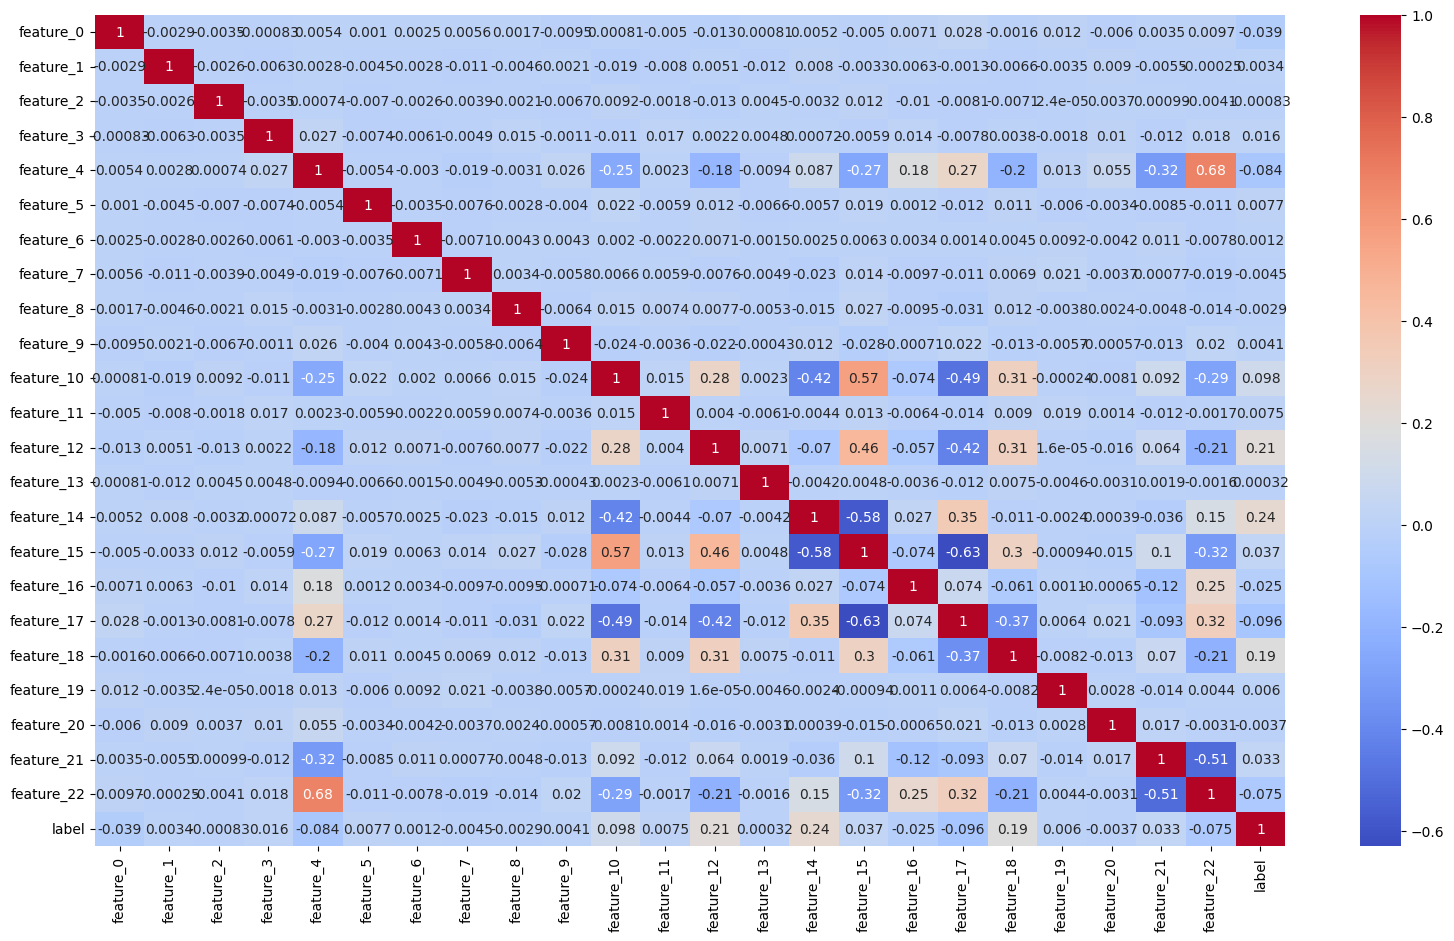

In [83]:
plt.figure(figsize=(19.2,10.8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
def evaluate_model(y_test,y_pred):
    print("Classification Report")
    print(classification_report(y_test, y_pred))

    print("\n---------------------------------------------\n")
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Create a heatmap of the confusion matrix using Seaborn
    sns.heatmap(cm, annot=True, cmap='Greens',fmt='.0f')

    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')

    plt.show()


Training Decision Tree...

Results for Decision Tree:
Classification Report
              precision    recall  f1-score   support

           0       0.66      0.66      0.66      3566
           1       0.71      0.70      0.71      5799
           2       0.76      0.76      0.76     10635

    accuracy                           0.73     20000
   macro avg       0.71      0.71      0.71     20000
weighted avg       0.73      0.73      0.73     20000


---------------------------------------------



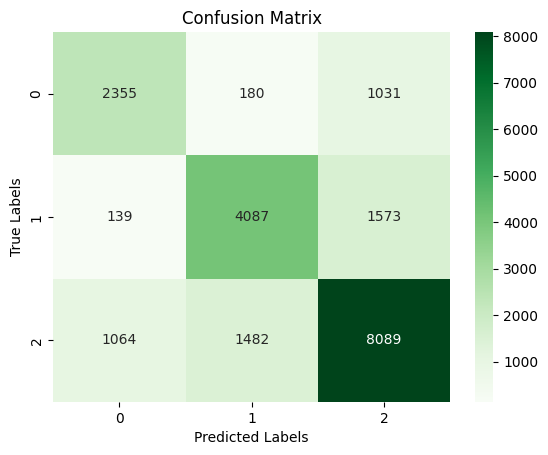


Training Random Forest...

Results for Random Forest:
Classification Report
              precision    recall  f1-score   support

           0       0.77      0.80      0.79      3566
           1       0.81      0.84      0.83      5799
           2       0.85      0.82      0.83     10635

    accuracy                           0.82     20000
   macro avg       0.81      0.82      0.82     20000
weighted avg       0.82      0.82      0.82     20000


---------------------------------------------



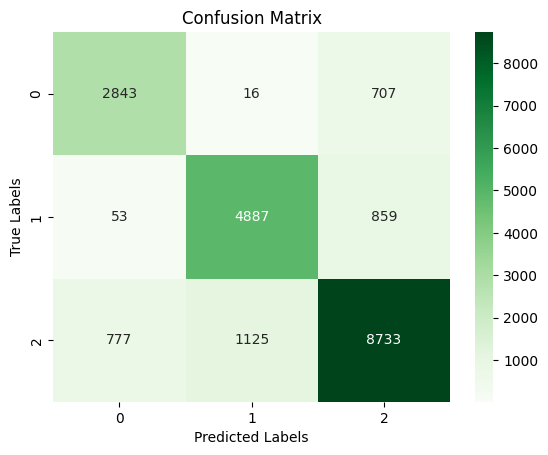


Training Logistic Regression...

Results for Logistic Regression:
Classification Report
              precision    recall  f1-score   support

           0       0.53      0.45      0.49      3566
           1       0.63      0.45      0.53      5799
           2       0.63      0.76      0.69     10635

    accuracy                           0.61     20000
   macro avg       0.60      0.55      0.57     20000
weighted avg       0.61      0.61      0.60     20000


---------------------------------------------



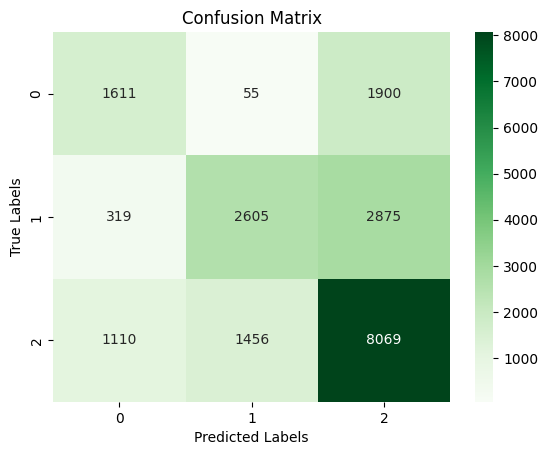


Training KNN...

Results for KNN:
Classification Report
              precision    recall  f1-score   support

           0       0.50      0.60      0.54      3566
           1       0.63      0.57      0.60      5799
           2       0.71      0.70      0.70     10635

    accuracy                           0.64     20000
   macro avg       0.61      0.62      0.62     20000
weighted avg       0.65      0.64      0.64     20000


---------------------------------------------



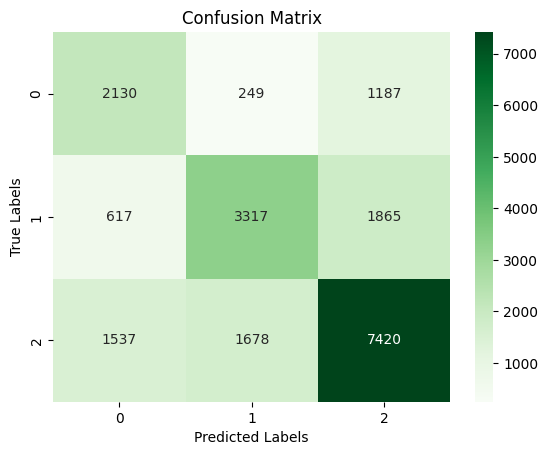


Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:03:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Results for XGBoost:
Classification Report
              precision    recall  f1-score   support

           0       0.69      0.74      0.72      3566
           1       0.77      0.76      0.77      5799
           2       0.80      0.80      0.80     10635

    accuracy                           0.77     20000
   macro avg       0.76      0.76      0.76     20000
weighted avg       0.78      0.77      0.78     20000


---------------------------------------------



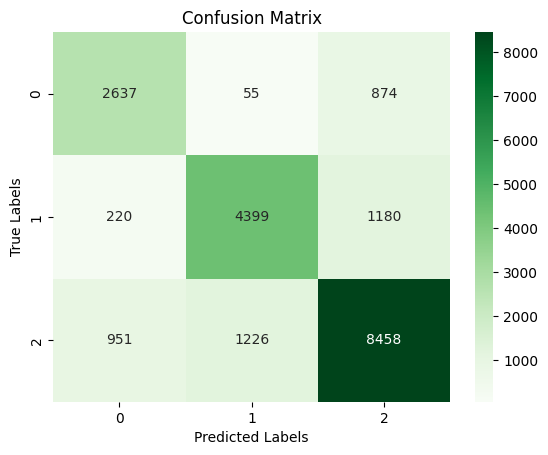

In [ ]:
classifiers = {
    "Decision Tree": DecisionTreeClassifier(random_state=17),
    "Random Forest": RandomForestClassifier(random_state=17),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=17),
    "KNN": KNeighborsClassifier(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=17)
}

# Train, predict, and evaluate each classifier
for name, clf in classifiers.items():
    print(f"\nTraining {name}...")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\nResults for {name}:")
    evaluate_model(y_test, y_pred)

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      3566
           1       0.81      0.84      0.83      5799
           2       0.85      0.82      0.83     10635

    accuracy                           0.82     20000
   macro avg       0.81      0.82      0.82     20000
weighted avg       0.82      0.82      0.82     20000


---------------------------------------------



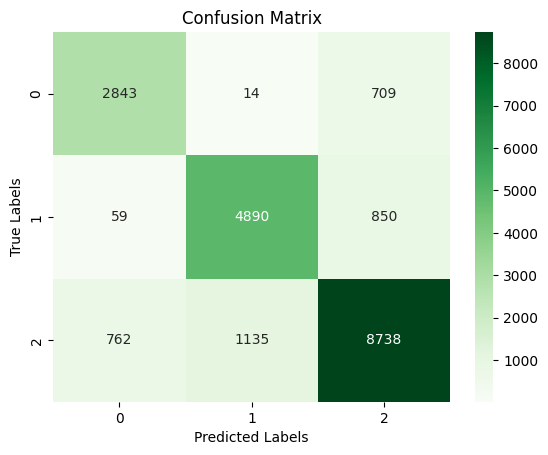

In [ ]:
# Creating the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the classifier
rf_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
evaluate_model(y_test, y_pred)


In [75]:
import shap

# Use TreeExplainer for tree-based models like RandomForest
explainer = shap.TreeExplainer(rf_classifier)

# Compute SHAP values on the test set
shap_values = explainer.shap_values(X_test[:200])



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Label encoding (if not already done)
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
rf_model = RandomForestClassifier(random_state=17)

# Train models
rf_model.fit(X_train, y_train_enc)

pred_rf = rf_model.predict(X_test)

# Decode predictions
decoded_rf = le.inverse_transform(pred_rf)

# Print sample predictions
print("Random Forest:", decoded_rf[:10])

for i in decoded_rf[:10]:
    if i == 2:
        print("Good Credit Score: Loan Approved, Have A Good Day 🙂")
    elif i == 0:
        print("Bad Credit Score,Loan Rejected 😭")
    else:
        print("Standard Credit, Loan Pending, Manual check required, don't lose hope 😢")

Random Forest: [2 1 2 1 2 2 1 0 1 2]
Good Credit Score: Loan Approved, Have A Good Day 🙂
Standard Credit, Loan Pending, Manual check required, don't lose hope 😢
Good Credit Score: Loan Approved, Have A Good Day 🙂
Standard Credit, Loan Pending, Manual check required, don't lose hope 😢
Good Credit Score: Loan Approved, Have A Good Day 🙂
Good Credit Score: Loan Approved, Have A Good Day 🙂
Standard Credit, Loan Pending, Manual check required, don't lose hope 😢
Bad Credit Score,Loan Rejected 😭
Standard Credit, Loan Pending, Manual check required, don't lose hope 😢
Good Credit Score: Loan Approved, Have A Good Day 🙂
